<a href="https://colab.research.google.com/github/TiagoAA/SVTS/blob/main/EddyCurrent_Artigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregar Diretório

In [2]:
# # Montar o google drive: 
import datetime
from pytz import timezone
import os
import math
from google.colab import drive
drive.mount("/content/drive/")

###==================================================
## Definir diretório onde estão contidos os arquivos das classes
path = '/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/'
os.chdir(path)


print("Sistema preparado para rodar!")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Sistema preparado para rodar!
04-03-2021 15:27:35


#Classes

##Classe Arquivo

In [3]:
# -*- coding: utf-8 -*-
import sys 
import os
import datetime
from pytz import timezone
import csv


#########################################################
## Classe carregar arquivos 
##                                             
## Tiago Araujo                                13-08-2020
#########################################################
class ClasseEditarArquivo:

  def __init__(self):
    pass

#########################################################
# Função:  
# Parametros: 
#########################################################
  def getLine(self, Matrix, NumLine): 
    try:
        return Matrix[NumLine]
    except Exception as e:
        print("Erro no metodo getLine: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);  

#########################################################
# Função:  
# Parametros: 
#########################################################
  def getColumn (self, Matrix, NumColumn): 
    try:
      column = [];
      for row in Matrix:
        column.append(row[NumColumn]);   
      return column;
    except Exception as e:
        print("Erro no metodo getColumn: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   


#########################################################
# Função:  Carega dado arquivo externo
# Parametros: 
# Path = diretório 
# File = nome do arquivo com a extensão. Ex. "dado.txt"
# Delimiter= 1=" ", 2="\t" ou uma string com o delimitador 
#########################################################
  def openFile(self, Path, File, Delimiter): 
    try:
      caminho = Path + "/" +File;
        
      #definei o caracter de separação
      if (Delimiter == 1):        # espaço simples
        delimiter = ' '
      elif (Delimiter == 2):      # tabulação
        delimiter = '\t'
      else:                       # delimitador especificado
        delimiter = Delimiter

      # abrir arquivo
      array = [];
      with open(caminho, 'r') as f:
        row1 = [float(x) for x in next(f).split(delimiter)]
        rows = [[float(x) for x in line.split(delimiter)] for line in f]

      # concatenar dados
      array.append(row1)
      for linha in range(len(rows)):
        array.append(rows[linha])

      # retornar vetor como lista simples
      size = self.getSize(array);
      if (size[0]==1):
        array = self.getLine(array,0);
      elif (size[1]==1):     
        array = self.getColumn(array,0);

      return array;
    except Exception as e:
        print("Erro no metodo openFile: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   

#########################################################
# Função:  Salva matriz de dados em arquivo txt
# Parametros: 
# Matriz = dados a seram exportado, 
# Path = diretório onde será armazenado 
# FileName nome do arquivo com a extesão: "dado.txt" 
# Delimiter = espaçamento entre colunas. 1=espaço simples
#########################################################
  def writeFileTXT(self, Matriz, Path, FileName, Delimiter): 
    try:
      caminho = Path + "/" + FileName;
      size = self.getSize(Matriz);      

      #definei o caracter de separação
      if (Delimiter == 1):        # espaço simples
        dlm = ' '
      elif (Delimiter == 2):      # tabulação
        dlm = '\t'
      else:                       # delimitador especificado
        dlm = Delimiter

      #  abre arquivo para escrita
      with open(caminho,"w") as txt_file:
        if (size[0] > 1):
          csv.writer(txt_file, delimiter = dlm).writerows(Matriz);
        else:
          csv.writer(txt_file, delimiter = dlm).writerow(Matriz);

      print("Arquivo exportado: Linhas = %d e Colunas = %d"% (size[0], size[1]))
      print("Local: ", caminho)

      txt_file.close()  
    except Exception as e:
        print("Erro no metodo writeFileTXT: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e); 




#########################################################
# Função:  Retorna um vetor correspondente à coluna selecionada
# Parametros: 
# Path = diretório 
# File = nome do arquivo com a extensão. Ex. "dado.txt"
# Delimiter= 1=" ", 2="\t" ou uma string com o delimitador 
# Column = número da coluna a ser importada
#########################################################
  def openFileColumn(self, Path, File, Delimiter, Column): 
    try:      
      arquivo  = self.openFile(Path, File, Delimiter);
      Vetor = [];
      size = self.getSize(arquivo);
      if (size[1] >= Column):
        Vetor.append(self.getColumn(arquivo, Column));
      else:
        print("Arquivo possui apenas ", size[1], " colunas!")
      return Vetor;
    except Exception as e:
      print("Erro no metodo openFileColumn: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   

 #########################################################
# Função:  Retorna um vetor correspondente à linha selecionada
# Parametros: 
# Path = diretório 
# File = nome do arquivo com a extensão. Ex. "dado.txt"
# Delimiter= 1=" ", 2="\t" ou uma string com o delimitador 
# Column = número da coluna a ser importada
#########################################################
  def openFileLine(self, Path, File, Delimiter, Line): 
    try:      
      arquivo  = self.openFile(Path, File, Delimiter);
      Vetor = [];
      size = self.getSize(arquivo);
      if (size[0] >= Line):
        Vetor.append(self.getLine(arquivo, Line));
      else:
        print("Arquivo possui apenas ", size[0], " Linhas!")
      return Vetor;
    except Exception as e:
      print("Erro no metodo openFileLine: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);             

#########################################################
# Função: Retorna o tamnho da matriz [linhas: colunas] 
# Parametros: 
#########################################################
  def getSize(self, Matrix): 
    try:
      size = [];

      NumL = 0
      if (type(Matrix) is list):
        for elementos in Matrix:
          NumL += 1
      else:
        NumL = 1;

      NumC = 0
      if (type(Matrix[0]) is list):
        for elementos in Matrix[0]:
          NumC += 1
      else:
        NumC = NumL;
        NumL = 1;

      size.append(NumL)
      size.append(NumC)
      print("getSize = %d x %d" % (size[0], size[1]))
      return size
    except Exception as e:
        print("Erro no metodo getSize: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   


#########################################################
 # Função:  retorna o diretório do script executado
 # Parametros: 
 #########################################################
  def getCurrentDirectory(self):
    try:
        currentDirectory = os.getcwd()
        print(currentDirectory)
        return currentDirectory
    except Exception as e:
        print("Erro no metodo getCurrentDirectory: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
        print(e); 

#########################################################
# Função:  Retorna o diretorio anterio. Ex cd..
# Parametros: 
#########################################################
  def getDiretorioAnterior(self, CurrentPath): 
    try:
      PathPrevius = os.path.abspath(os.path.join(CurrentPath, os.pardir))
      return PathPrevius
    except Exception as e:
      print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 




 #########################################################
 # Função: Cria uma pasta  
 # Parametros: 
 #########################################################
  def criarPasta(self, Path, FolderName): 
    try:     
      caminho = Path + "/" + FolderName;  
      if not os.path.exists(caminho):
        os.makedirs(caminho)        
      else:
        print("\nPasta já existente ou diretório errado!")
        print(caminho)
      return caminho
    except Exception as e:
      print("Erro no metodo criarPasta: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 

 #########################################################
 # Função:  
 # Parametros: 
 # Path = diretório  
 # Extetion = extenção. Ex: "txt"
 #########################################################
  def getListaArquivos(self, Path, Extetion): 
    try:
      text_files = [f for f in os.listdir(Path) if f.endswith(Extetion)]
      print("\n===========================================")
      print("Lista de arquivos com extensão: ", Extetion)
      print("Path: ", Path)
      print("Total de arquivos: ", len(text_files))
      
      for file in range(len(text_files)):
        print(text_files[file])
      print("===========================================\n")  

      return text_files
    except Exception as e:
      print("Erro no metodo getListaArquivos: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 


#########################################################
# Função:  ## https://www.python-course.eu/python3_formatted_output.php
# Parametros: 
#########################################################
  def PrintFormat(self): 
    try:
      aa = 1234.56345456687
      bb = 3.131516174565678345345
      print("=======================PrintFormat=======================")
      print("O numero %d e o %1.2f" % (aa, bb))
      print("%10.3e"% (bb))
      print("%10.3E"% (bb))
      print("%10o"% (21))
      print("%10.3o"% (21))
      print("%10.5o"% (25))
      print("%5x"% (47))      
      print("%5.4x"% (47))
      print("%5.4X"% (47))
      print("Only one percentage sign: %% " % ())

    except Exception as e:
        print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
        print(e); 

# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#         return 1
#     except Exception as e:
#         print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#         print(e); 




print("ClasseEditarArquivo carregada!")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))




ClasseEditarArquivo carregada!
04-03-2021 15:27:37


##Classe Plote

In [4]:
# -*- coding: utf-8 -*-
import sys 
import datetime
from pytz import timezone
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes

plt.style.use('default')
print(plt.style.available)

params = {'legend.fontsize': 14,
          'figure.figsize': (9, 5),
         'axes.labelsize': 18,
         'axes.titlesize':18,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
plt.rcParams.update(params)



#########################################################
## Classe desenvolvida gerenciar os plotes 
##                                             
## Tiago Araujo                                13-08-2020
#########################################################
class ClassePlote(ClasseEditarArquivo):
  
  def __init__(self):
    self.__CurrentFigure = 0;
    self.__FIG = 0;
    self.__AXE = 0;    
    

#########################################################
# Função:  Salva os plotes com PNG e PDF
# Parametros: 
# FlagPlot = 1 para exportar figura, 
# Path = diretoório onde será armazenado a figura, 
# FigName = nome da figura SEM a extensão
#########################################################
  def savePlot(self, FlagPlot, Path, FigName): 
    try:
      FigPNG = Path + "/" + FigName + ".png";
      FigPDF = Path + "/" + FigName + ".pdf";      

      plt = self.__CurrentFigure;      

      if (FlagPlot == 1):
        plt.savefig(FigPNG, dpi = 300, bbox_inches='tight'); 
        plt.savefig(FigPDF, dpi = 300, bbox_inches='tight');
        print("Figura salva em: ", Path + "/" + FigName);

    except Exception as e:
        print("Erro no metodo savePlot: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   


#########################################################
# Função:  Salva os plotes com PNG e PDF
# Parametros: 
# FlagPlot = 1 para exportar figura, 
# Path = diretoório onde será armazenado a figura, 
# FigName = nome da figura SEM a extensão
# Figura = ponteiro para a figura. => Figura = plt.figure();
#########################################################
  def exportPlot(self, FlagPlot, Path, FigName, Figura, OnlyPNG=False): 
    try:
      FigPNG = Path + "/" + FigName + ".png";
      FigPDF = Path + "/" + FigName + ".pdf";      

      plt = Figura;      

      if (FlagPlot == 1):
        if (OnlyPNG):
          plt.savefig(FigPNG, dpi = 300, bbox_inches='tight'); 
        else:
          plt.savefig(FigPDF, dpi = 300, bbox_inches='tight');
          plt.savefig(FigPNG, dpi = 300, bbox_inches='tight'); 
        print("Figura salva em: ", Path + "/" + FigName);      
      return Figura
    except Exception as e:
        print("Erro no metodo exportPlot: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);   



#########################################################
  # Função realiza o plote de vetor x e y
  # Parametros:
  # - VetorX
  # - VetorY
  # - Xlabel
  # - Ylabel
  # - legend 
#########################################################
  def ploteXY(self, VetorX, VetorY, Xlabel, Ylabel, Legenda):
    try:
      self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

      if (Legenda != ""):
        plt.plot(VetorX, VetorY, 'k', linewidth=1, markersize=5, mfc='r',  label=Legenda)
        leg = plt.legend(loc='best', shadow=True, fancybox=True)
        leg.get_frame().set_alpha(0.5)
      else:
        plt.plot(VetorX, VetorY, 'k-', linewidth=1.0)
          
      plt.xlabel(Xlabel);
      plt.ylabel(Ylabel); 
      plt.grid(True);      
      plt.show();    

    except Exception as e:
      print("Erro no metodo ploteXY: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);
    
    
#########################################################
  # Função realiza o plote de vetor y
  # Parametros:
  # - VetorY
  # - Xlabel
  # - Ylabel
  # - legend 
#########################################################
  def ploteY(self, VetorY, Xlabel, Ylabel, Legenda):
    try:
      self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

      # VetorX = self.getRange(0, len(VetorY)-1, 1);
      if (Legenda != ""):
        plt.plot(VetorY, 'k-', linewidth=1.0,  label=Legenda)
        leg = plt.legend(loc='best', shadow=True, fancybox=True)
        leg.get_frame().set_alpha(0.5)
      else:
        plt.plot(VetorY, 'k-', linewidth=1.0)
          
      plt.xlabel(Xlabel);
      plt.ylabel(Ylabel);     

      plt.grid(True);      
      plt.show();    

    except Exception as e:
      print("Erro no metodo ploteY: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);



#########################################################
# Função realiza o plote de vetor x e y para multiplos plotes. Esta função deve
#  ser inicializada. Os plotes seguintes são realizados com a função ploteMultiploStop
# Parametros:
# - VetorX
# - VetorY
# - legend 
# - Xlabel
# - Ylabel
# - Estilo 
# - CorMarca
# '-'	solid line style
# '--'	dashed line style
# '-.'	dash-dot line style
# ':'	dotted line style
#########################################################
  def ploteMultiploStart(self, VetorX, VetorY, Legenda, Estilo, CorMarca):
    try:     

      fig, ax = plt.subplots(1)
      ax.plot(VetorX, VetorY, Estilo, linewidth=1, markersize=5, mfc=CorMarca,  label=Legenda)
   
      self.__FIG = plt.gcf().number;
      self.__AXE = ax;

    except Exception as e:
      print("Erro no metodo ploteMultiploStart: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);


#########################################################
# Função realiza o plote de vetor x e y para multiplos plotes.
#  Adiciona os plotes após a função ploteMultiploStart
# Parametros:
# - VetorX
# - VetorY
# - legend 
# - Xlabel
# - Ylabel
# - Estilo 
# - CorMarca
# - UltimoPlot: adiciona plote enquanto diferênte de zero
#########################################################
  def ploteMultiploStop(self, VetorX, VetorY, Legenda, Estilo, CorMarca, Xlabel, Ylabel, UltimoPlot): 
    try:        
      self.__CurrentFigure = plt.figure(self.__FIG); # permite salvar as corrente figura

      # plt.figure(self.__FIG)   
      # self.__AXE.plot(VetorX, VetorY, Estilo, linewidth=1, markersize=5, mfc=CorMarca,  label=Legenda); 
      plt.plot(VetorX, VetorY, Estilo, linewidth=1, markersize=5, mfc=CorMarca,  label=Legenda);    
      # print("Stop = ", self.__CurrentFigure) 

      if (UltimoPlot == 0): # so execultar no ultimo grafico adicionado
        plt.xlabel(Xlabel);
        plt.ylabel(Ylabel);
        leg = plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.20), 
                         shadow=True, fancybox=True) #mode="expand",
        leg.get_frame().set_alpha(0.5)
        # plt.legend(loc='best', facecolor='inherit'); # shadow=True, fontsize='x-large' 
        plt.grid(True); 
        plt.show()      

    except Exception as e:
      print("Erro no metodo ploteMultiploStop: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
#Função realiza o plote histograma 1D
# Parametros: 
#########################################################
  def plotHistograma1D(self, Dado, Nbins, BoolDensity, Xlabel, Ylabel, Legend):
    try:
      self.__CurrentFigure = plt.figure(); # permite salvar as corrente figura

      if (BoolDensity):
        bins =  plt.hist(Dado, Nbins, density=BoolDensity)
        plt.hist(Dado, Nbins, edgecolor='k', histtype ='step', label=Legend)
      else:
        bins =  plt.hist(Dado, Nbins, density=BoolDensity, label=Legend)
        plt.hist(Dado, Nbins, edgecolor='k', histtype ='step')

      plt.xlabel(Xlabel)
      plt.ylabel(Ylabel)
      # plt.legend(loc='best', facecolor='inherit'); 
      leg = plt.legend(loc='best', shadow=True, fancybox=True)
      leg.get_frame().set_alpha(0.5)     
      plt.grid(True)
      plt.show()
    except Exception as e:
        print("Erro no metodo plotHistograma1D: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);
    
    
#########################################################
#Função realiza o plote de vetor x e y
# Parametros: 
#########################################################
  def getRandomVector(self, lenght, mu, sigma): 
    try:
        return (mu + sigma * np.random.randn(lenght))
    except Exception as e:
        print("Erro no metodo getRandomVector: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);

#########################################################
# Função: criar um range de elemento no intervalo de start
# e stop com passo step
#########################################################
  def getRange(self, start, stop, step):
    try:
      return list(np.arange(start, stop+step, step))
    except Exception as e:
      print("Erro no metodo getRange: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);


#########################################################
#Função realiza o plote histograma 1D
# Parametros: 
#########################################################
  def plotHistogramaCumulative(self, Dado, Nbins, BoolDensity, Xlabel, Ylabel, Legend):
    try:
      self.__CurrentFigure = plt.figure(figsize=(self.__FigW, self.__FigH)); # permite salvar as corrente figura
       
      plt.hist(Dado, Nbins, density=True, cumulative =True, histtype ='step', label="cumulative", linewidth=2)

      plt.xlabel(Xlabel)
      plt.ylabel(Ylabel)      
      leg = plt.legend(loc='best', shadow=True, fancybox=True)
      leg.get_frame().set_alpha(0.5)     
      plt.grid(True)
      plt.show()
    except Exception as e:
        print("Erro no metodo plotHistograma1D: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);
            
    
#########################################################
# Função:  
# Parametros: 
# Dado, dados
# Nbins, número de bins
# Xlabel, eixo x
# Ylabel, eixo y
# Xmim, limite gráfico principal
# Xmax, 
# XmimZoom, limite gráfico zoom
# XmaxZoom
#########################################################
  def plotHist2Cum(self, Dado, Nbins, Xlabel, Ylabel, Xmim, Xmax, XmimZoom, XmaxZoom): 
    try:      
      
      self.__CurrentFigure, axes = plt.subplots(nrows=2, ncols=1)

      myfig = plt.subplot(211)
      plt.hist(Dado, bins=Nbins, density=True, cumulative=True, histtype='step', linewidth=1.5)
      plt.xlabel(Xlabel)
      plt.ylabel(Ylabel) 
      plt.title("Distribuição Cumulativa",color='black');
      plt.xlim(Xmim, Xmax)
      myfig.grid(color='skyblue',linestyle='--')

      ins = inset_axes(myfig,
                        width="50%", # width = 30% of parent_bbox
                        height="60%", # height : 1 inch
                        loc='center right')

      ins.hist(Dado, bins=Nbins, density=True, cumulative=True, histtype='step', linewidth=1.5)
      plt.xlim(XmimZoom, XmaxZoom)
      plt.locator_params(axis='x', nbins=5)
      plt.locator_params(axis='y', nbins=5)
      plt.title("Zoom",color='black');
      ins.set_facecolor('silver');
      ins.grid(color='skyblue',linestyle='--')

      myfig = plt.subplot(212)
      bins = plt.hist(Dado, bins=Nbins, density=False, alpha=0.8, histtype='stepfilled')
      plt.hist(Dado, bins=Nbins, edgecolor='k', histtype ='step', linewidth=1.0)
      plt.xlabel(Xlabel)
      plt.ylabel(Ylabel) 
      plt.title("Histograma",color='black');
      plt.xlim(Xmim, Xmax)
      myfig.grid(color='skyblue',linestyle='--')


      ins = inset_axes(myfig,
                        width="50%", # width = 30% of parent_bbox
                        height="60%", # height : 1 inch
                        loc='center right')

      ins.hist(Dado, bins=Nbins, density=False, alpha=0.8, histtype='stepfilled')
      ins.hist(Dado, bins=Nbins, edgecolor='k', histtype ='step', linewidth=1.0)
      plt.xlim(XmimZoom, XmaxZoom)
      plt.locator_params(axis='x', nbins=5)
      plt.locator_params(axis='y', nbins=5)
      plt.title("Zoom",color='black');
      ins.set_facecolor('silver');
      ins.grid(color='skyblue',linestyle='--')

      self.__CurrentFigure.tight_layout(pad=2.0) # Or equivalently,  "plt.tight_layout()"
      plt.show()


    except Exception as e:
        print("Erro no metodo plotHist2Cum: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);   


#########################################################
# Função:  
# Parametros: 
#########################################################
  def plotBar(self, Dado, Width, Xlabel, Ylabel, Legenda): 
    try:
      self.__CurrentFigure = plt.figure();

      plt.bar(self.getRange(1,len(Dado),1), Dado, width=Width, label=Legenda)
      leg = plt.legend(loc='best', shadow=True, fancybox=True)
      leg.get_frame().set_alpha(0.5)
      plt.xlabel(Xlabel)
      plt.ylabel(Ylabel) 
      plt.show();

    except Exception as e:
      print("Erro no metodo plotBar: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    
      print(e);

#########################################################
# Função:  
# Parametros: 
#########################################################
  def plotPie(self, X, Percentagem, Legendas, Titulo, TituloLegenda, AtivarLabel): 
    try:
      
      self.__CurrentFigure, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))
 
      if (AtivarLabel): 
        wedges,  autotexts = ax.pie(X, labels=Percentagem, wedgeprops=dict(width=0.6), 
                                  startangle=0, labeldistance=0.6)    
      else:
        wedges,  autotexts = ax.pie(X, wedgeprops=dict(width=0.6), 
                                  startangle=0, labeldistance=0.6)
      
      for jj in range(len(autotexts)):  
        autotexts[jj].set_fontsize(16)
        
       
      ax.legend(wedges, Legendas,
                title=TituloLegenda,
                title_fontsize=20,
                prop={'size': 16},
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1))

      ax.set_title(Titulo, fontsize=20, loc="center")
      plt.show()

    except Exception as e:
      print("Erro no metodo plotPie: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    
      print(e);   

#########################################################
# Função:  
# Parametros: 
#########################################################
  def plotBarPercentagem(self, Var, Percentagem, Legendas, Titulo, TituloLegenda): 
    try:
      
      self.__CurrentFigure, ax = plt.subplots()

      for jj in range(len(Var)):
        rect = ax.bar(jj+1, Var[jj], 0.8, label=Legendas[jj])
        ax.text(jj+1-0.2, Var[jj]/2, Percentagem[jj],).set_fontsize(16)    

      # legendas
      ax.set_xticklabels(['']*len(Var))
      ax.set_ylabel('Percentagem [%]')
      ax.legend(Legendas,
                title=TituloLegenda,
                title_fontsize=20,
                prop={'size': 16},
                loc="center left",
                bbox_to_anchor=(1, 0, 0.5, 1))

      ax.set_title(Titulo, fontsize=20, loc="center")         

      plt.show()

    except Exception as e:
      print("Erro no metodo plotBarPercentagem: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    
      print(e); 


#########################################################
# Função: subdivide os elementos do vetor em grupos com 
# espaçamento dado pela divisão do número de fatias.
# Retorna: os limites entre grupos e a quantidade de elementos
# por grupo 
# Parametros: 
# Vetor dados a serem subdivididos 
# NumFatias numero de fatias
#########################################################
  def getSubGrupos(self, Vetor, NumFatias): 
    try:
      Fatias = NumFatias
      Vmin = min(Vetor);
      Vmax = max(Vetor);
      Step = (Vmax-Vmin)/(Fatias)

      # calcula range de subgrupos
      aux = []
      for ii in range(Fatias-1):
        aux.append(ii+1)

      Limites = list(np.array(aux) * Step)
      Limites.append(Vmax)

      # inicializa QuantidadeSubGrupos
      QuantidadeSubGrupos = []
      for ii in range(Fatias):
        QuantidadeSubGrupos.append(0)

      # Contabiliza a quantidade por subgrupo
      for jj in range(len(Vetor)):  
        for ii in range(Fatias):
          if (Vetor[jj] <= Limites[ii]):
            QuantidadeSubGrupos[ii] += 1
            break

      del Limites[-1]

      return (Limites, QuantidadeSubGrupos)
    except Exception as e:
      print("Erro no metodo getSubGrupos: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 

#########################################################
# Função:  
# Parametros: 
#########################################################
  def getPieDataPlot(self, Vetor, NumFatias, Simbolo): 
    try:
      # Achar divisão dos grupos
      LIM, SUB = self.getSubGrupos(Vetor, NumFatias)
   
      # Calcula a percentagem
      Pesos = (np.array(SUB)/len(Vetor))*100

      # cria label de percentagem
      Faixa = []
      Faixa += [int(min(Vetor))]
      Faixa += [int(x) for x in LIM]
      Faixa += [int(max(Vetor))]

      # criar legendas
      Legendas = []
      Percentagem = []
      for jj in range(len(Faixa)-1):  
        Legendas.append("de %d até %d %s $\Rightarrow$ %1.2f %%" % (Faixa[jj], Faixa[jj+1], Simbolo, Pesos[jj]))
        Percentagem.append("{:.2f} %".format(Pesos[jj])) 

      return (Pesos, Percentagem, Legendas)

    except Exception as e:
      print("Erro no metodo getPieDataPlot: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e); 


# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#         return 1
#     except Exception as e:
#         print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));    print(e);   




print("ClassePlote carregada!")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
ClassePlote carregada!
04-03-2021 15:27:38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  


##Classe GPS Eddy Current

In [5]:
# -*- coding: utf-8 -*-
import sys 
import datetime
from pytz import timezone
import numpy as np


#########################################################
## Classe desenvolvida para processar sinais do Eddy 
## Current no projeto Sistema de Verificação de Trincas 
## Superficiais (SVTS) desenvolvido conjuntamente entre a
## MRS e a UFJF
##                                             
## Tiago Araujo                                13-08-2020
#########################################################
class ClasseGPS(ClasseEditarArquivo):
  
  def __init__(self):
    pass


  #########################################################
  # Função: criar um range de elemento no intervalo de start
  # e stop com passo step
  #########################################################
  def myRange(self, start, stop, step):
    try:
      return list(np.arange(start, stop+step, step))
    except Exception as e:
      print("Erro no metodo myRange: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


  #########################################################
  # Função:
  # Sincroniza os indices do GPS (menor frequência de aquisição)
  # com o sinal amostrado pelo Eddy Current.
  # Entrada: 
  # Cada o número de linha (aquisições) dos dados do eddy current e
  # do GPS (arquivo trajetória);
  # SizeEddyCurrentdata = Tamanho dos dados do Eddy Current
  # SizeGPSdata = Tamanho dos dados do GPS
  # Retorna: 
  # vetor com os indices dos arquivo de trajetoria do GPS. Portanto
  # ao localizar um evento no arquivo do eddy current, basta carregar o dado
  # do GPS que correponde ao índice da mesma posição do vetor (sinal), onde
  # o threshold voi acionado.
  #########################################################
  def ajustarFequenciaGPS(self, SizeEddyCurrentdata, SizeGPSdata):   
    try:
      tempo = 1;
      fa = SizeGPSdata/tempo;   #GPS
      fb = SizeEddyCurrentdata/tempo;   #Eddy Current

      print('\nFrequência de aquizição do GPS = ', fa)
      print('Frequência de aquizição do Eddy Current = ', fb)

      ta = tempo/SizeGPSdata;
      tb = tempo/SizeEddyCurrentdata;

      tgps = self.myRange(0, tempo, ta);
      tedc = self.myRange(0, tempo, tb);

      kgps    = 0;
      Indice  = [];

      for ii in range(SizeEddyCurrentdata):  
        if (tedc[ii] <= tgps[kgps]):
          Indice.append(kgps)
        else: 
          Indice.append(kgps)
          if (kgps < SizeGPSdata):
            kgps = kgps + 1;
            
      return Indice
    except Exception as e:
        print("Erro no metodo AjustarFequenciaGPS: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);


  #########################################################
  # Função 
  # Retorna a posição da linha no arquivo de trajetoria do GPS, onde a falha 
  # foi detectada no arquivo de sinal do eddy current.
  # Entrada: índices do GPS corrigido pela função 'AjustarFequenciaGPS' e
  # indice dos eventos detectados no sinal do eddy current (posição d threshold)
  # 
  # Dados arquivo Trajetória:
  # [latitude, longitude, velocidade, direção, truth], para toda a trajetória
  # Dados arquivo Falhas:
  # [latitude, longitude, velocidade, direção, Índice], apenas para os pontos de falhas
  #########################################################
  def getIndiceGPS(self, IndiceGPScorrigido, iDThreshold): 
    try:
      indice = [];
      kk = 0;
      for ii in range(len(IndiceGPScorrigido)):
        if (ii == iDThreshold[kk]):
          indice.append(IndiceGPScorrigido[ii]);
          if (kk < len(iDThreshold)-1):
            kk += 1    
      return  indice;        
    except Exception as e:
      print("Erro no metodo GetIndiceGPS: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  print(e);

  #########################################################
  # Função: Realiza a operação do método ajustarFequenciaGPS 
  # e do método getIndiceGPS
  # Parametros: SizeEddyCurrentdata, SizeGPSdata, iDThreshold
  #########################################################
  def getIndiceGPSTrajetoria(self, SizeEddyCurrentdata, SizeGPSdata, iDThreshold):
    try:        
      IndiceGPScorrigido = self.ajustarFequenciaGPS(SizeEddyCurrentdata, SizeGPSdata);
      return self.getIndiceGPS(IndiceGPScorrigido, iDThreshold);
    except Exception as e:
      print("Erro no metodo getIndiceGPSFull: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

  #########################################################
  # Função: Retorna a matriz com os dados do GPS onde foram 
  # identificados falhas (threshold) 
  # Parametros: 
  # TrajetoriaGPS = arquivo da trajetória do GPS
  # iDfalhas = vetor de saida da função getIndiceGPSFull ou
  # getIndiceGPS
  #########################################################
  def getArquivoFalhaGPS(self, TrajetoriaGPS, iDfalhas): 
    try:
      FalhaGPS = [];
      NumFalha = len(iDfalhas);
      size = self.getSize(TrajetoriaGPS);
                  
      if (NumFalha <= size[0]):
        for ii in range(NumFalha):
          FalhaGPS.append(self.getLine(TrajetoriaGPS, iDfalhas[ii]));
      
      return FalhaGPS;        
        
    except Exception as e:
      print("Erro no metodo getArquivoFalhaGPS: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#         return 1
#     except Exception as e:
#         print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#         print(e);


print("ClasseGPS Carregada")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))

ClasseGPS Carregada
04-03-2021 15:27:38


##Classe Processamento Eddy Current

In [6]:
# -*- coding: utf-8 -*-
from scipy import signal
from scipy.signal import medfilt
import numpy as np
import math


#########################################################
## CLASSE AUXILIAR                                            
##                                             18-02-2021
#########################################################
class ClasseMath(ClassePlote):
  
  def __init__(self):
    pass

#########################################################
# Função:  Retorna a posição dos elementos maior que o patamar
# Parametros: 
# Exemplo:
# j=[4,5,6,7,1,3,7,5]
# print(j)
# x = [i for i in j if i > 5]
# print(x)
# xx = OperadorSinalEddyCurrent.findIndexMaior(j, 5)
# print(xx)
#########################################################
  def findIndexMaior(self, Vetor, patamar): 
    try:      
      result = [index for (index, Vetor) in enumerate(Vetor) if Vetor > patamar]
      return result
    except Exception as e:
      print("Erro no metodo findIndexMaior: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

#########################################################
# Função:  Retorna a posição dos elementos menor que o patamar
# Parametros: 
# Exemplo:
#########################################################
  def findIndexMenor(self, Vetor, patamar): 
    try:      
      result = [index for (index, Vetor) in enumerate(Vetor) if Vetor < patamar]
      return result
    except Exception as e:
      print("Erro no metodo findIndexMenor: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

#########################################################
# Função:  Função vai identificar os picos que ultrapassam os limites 
# inferiores e superiores do sinal
# Parametros: 
# Retorna a posição do pico e o pico
#########################################################
  def detectorPicoPatamar(self, Vetor, patamar_neg, patamar_pos): 
    try:
      MEDIA = np.mean(Vetor);
      coli = []
      cols = []

      if (patamar_neg < MEDIA):   
        coli = self.findIndexMenor(Vetor, patamar_neg)

      if (patamar_pos > MEDIA):
        cols = self.findIndexMaior(Vetor, patamar_pos)
      
      Xpico = []           
      for ii in range(len(coli)):
        Xpico.append(coli[ii]);        
      for ii in range(len(cols)):
        Xpico.append(cols[ii]); 
      Xpico.sort()
      
      Ypico = self.getIndex(Vetor, Xpico)

      return [Xpico, Ypico]
    except Exception as e:
      print("Erro no metodo detectorPicoPatamar: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

#########################################################
# Função:  Retorna os elementos na posição Index do Vetor
# Parametros: 
#########################################################
  def getIndex(self, Vetor, index): 
    try:
      Elementos = []
      for kk in range(len(index)):
        Elementos.append(Vetor[index[kk]])
      return Elementos
    except Exception as e:
      print("Erro no metodo getIndex: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função: Retorna os elementos entre start e stop 
# Parametros: 
#########################################################
  def getJanela(self, Vetor, Start, Stop): 
    try:
      size =  self.getSize(Vetor);
      Janela = []

      if (size[1]>Start and size[1]> Stop):
        for x in range(Start, Stop+1):
          Janela.append(Vetor[x])
      else:
        Janela = 1;      

      return Janela

    except Exception as e:
      print("Erro no metodo getJanela: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);       

#########################################################
# Função:  Matriz transposta de um array list
# Parametros: 
#########################################################
  def listTranspose(self, myList): 
    try:
      Transpose = np.array(myList).T.tolist();
      return Transpose
    except Exception as e:
      print("Erro no metodo listTranspose: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  media dos elementos linha
# Parametros: 
#########################################################
  def meanList(self, myList): 
    try:
      return [sum(row)/len(row) for row in myList]
    except Exception as e:
      print("Erro no metodo meanList: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#       return 1
#     except Exception as e:
#       print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#       print(e);

print("ClasseMath Carregada")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))   







#############################################################################
## CLASSE PROCESSAR DADOS EDDY CURENT                                             
##                                                                18-02-2021
#############################################################################
class ClasseProcessarEC(ClasseMath, ClassePlote):
  
  def __init__(self):
    pass

#########################################################
# Função: REMOVER OFFSET SINAL  
# Parametros: 
# Vetor = Sinal a ser tratado 
#########################################################
  def RemoverOffSet(self, Vetor): 
    try:
      MEDIA = np.mean(Vetor);
      SinalSemOffSet = Vetor - MEDIA;
      return SinalSemOffSet
    except Exception as e:
      print("Erro no metodo RemoverOffSet: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função: FILTRO MEDIANA  (remove spikes)
# Parametros: 
#########################################################
  def filtroMediana(self, Vetor, ordem): 
    try:
      SinalSemSpike = signal.medfilt(Vetor, ordem);
      return SinalSemSpike
    except Exception as e:
      print("Erro no metodo filtroMediana: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  FILTRO DEGRAL (remove spike de área não unitária)
# Parametros: 
#########################################################
  def filtroDegrau(self, Vetor, Patamar): 
    try:
      SinalFiltrado = Vetor;
      sigmaT = np.std(Vetor);

      #calcula a derivada do sinal
      SinalDerivada = np.diff(Vetor);

      #Pepar os pico encontrados na região de subida e descida do degrau   
      [Xpico, Ypico] = self.detectorPicoPatamar(SinalDerivada, -Patamar, Patamar)
      ind = self.getRange(0, len(Xpico), 2)

      for ii in range(math.floor(len(Xpico)/2)):
        myrange = self.getRange(Xpico[ind[ii]] + 1, Xpico[ind[ii]+1], 1)
        sigma_range = np.std(self.getIndex(Vetor, myrange));

        if (sigma_range < 0.5 * sigmaT):
          for kk in myrange:
            SinalFiltrado[kk] = SinalFiltrado[Xpico[ind[ii]]-1];                              

      return SinalFiltrado
    except Exception as e:
      print("Erro no metodo filtroDegrau: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função: THRESHOLD
# Realiza a detecção dos pontos que ultrapassam o patamar superior
# considerando que o pico possui um determinando nº de pontos antes e
# depois.
# Onde:
# Sinal = amplitude do sinal avaliado
# Pinferior = númerio de pontos antes e depois do pico que deven ter 
# amplitude inferior
# Patamar = Patamar para detectar o pico
# Delay = intervalo entre a detecção e o processamento
#########################################################
  def detectorThresholdPico(self, Sinal, Patamar, Pinferior, Delay=0): 
    try:
       #Pepar os pico positivos    
      [Xpico, Ypico] = self.detectorPicoPatamar(Sinal, min(Sinal)-1, Patamar)

      #Verificar se o pico possui o nº de pontos antes e depois
      Xthreshold = [];
      Ythreshold = [];
      picoDepois = 0; 

      for kk in range(len(Xpico)):
        flag = 0

        if (Xpico[kk] > picoDepois):
          picoDepois = Xpico[kk] + Pinferior;
          Xthreshold.append(Xpico[kk] + Delay);
          Ythreshold.append(Ypico[kk]);   

      return [Xthreshold, Ythreshold]
    except Exception as e:
      print("Erro no metodo detectorThresholdPico: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  JANELA THRESHOLD
# Função vai pegar LarguraJanela pontos antes e depois de cada posição
# determinada pelo Xthreshold no sinal. Portanto serão recortadas as
# janelas em torno dos pontos de Xthreshold.
# Ex:
# print("Janela = ", (Janelas_X1))
# print("Janela = ", Janelas_X1[0])
# print("Janela = ", Janelas_X1[1][0])
#########################################################
  def getJanelaThreshold(self, Sinal, Xthreshold, LarguraJanela): 
    try:
      NL = 2*LarguraJanela+1
      NC = len(Sinal)
      NT = len(Xthreshold)

      # inicializa list multidimensional arrays
      Janelas_X = [[] for _ in range(NT)] 
      Janelas_Y = [[] for _ in range(NT)]      

      for ii in range(len(Xthreshold)):
          if ((Xthreshold[ii]-LarguraJanela) <= 1):
            start = 1;
          else:
            start =  Xthreshold[ii]-LarguraJanela;

          if ((Xthreshold[ii]+LarguraJanela) > NC):
            stop = NC;
          else:
            stop = Xthreshold[ii]+LarguraJanela;
        
          window = self.getRange(start,stop,1)
          aplitd = self.getIndex(Sinal, window)

          if (len(window) == NL):
            for jj in range(len(window)):
              Janelas_X[ii].append(window[jj])
              Janelas_Y[ii].append(aplitd[jj])

      return [Janelas_X, Janelas_Y]
    except Exception as e:
      print("Erro no metodo getJanelaThreshold: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);

#########################################################
# Função:  Agrupar list
# Parametros: 
#########################################################
  def concatenaJanela(self, Janela_base, Janela_adicional): 
    try:
      return Janela_base + [Janela_adicional]
    except Exception as e:
      print("Erro no metodo concatenaJanela: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


 
# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#       return 1
#     except Exception as e:
#       print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#       print(e);


print("ClasseProcessarEC Carregada")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))   

ClasseMath Carregada
04-03-2021 15:27:40
ClasseProcessarEC Carregada
04-03-2021 15:27:40


##Classe Wavelet CWT

In [14]:
# -*- coding: utf-8 -*-
import pywt
import matplotlib
import matplotlib.pyplot as plt


#########################################################
##                                             
## Tiago Araujo                                01-02-2021
#########################################################
class ClasseWavelet(ClasseProcessarEC):
  
  def __init__(self):
    self.Fig_W = 5;
    self.Fig_H = 5;


#########################################################
# Função: Calcula a Continuous Wavelet Transform. 
# Parametros: 
# fs = 7500 (freq de amostragem)
# sampling_period = 1/fs
# scales = np.arange(1, 512)
# wavelet='cmor'
# wavlist = pywt.wavelist(kind='continuous')
# print(wavlist)
#########################################################
  def waveletPowerSpectrum(self, Sinal, scales, wavelet='cmor', sampling_period=1): 
    try:
      [coefficients, frequencies] = pywt.cwt(Sinal, scales, wavelet, sampling_period);
      power = (abs(coefficients)) ** 2;
      period = 1. / frequencies;

      return [coefficients, frequencies, power, period]    
    except Exception as e:
      print("Erro no metodo waveletPowerSpectrum: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função: Gera o plot para o Continuous Wavelet Transform. 
# Exporta o ponteito para a figura
# Parametros: 
# levels = [0.03125,0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32]
# Mycmap='jet'
# fs = 7500 (freq de amostragem)
# sampling_period = 1/fs
# time = range(0, len(Sinal))
# time = [(index*sampling_period) for index in time]
#########################################################
  def getPlotWaveletPowerSpectrum(self, time, frequencies, power, levels, Mycmap='jet', AtivarLegenda=False): 
    try:  
      plt.ioff();
      FIG = plt.figure(figsize=(self.Fig_W, self.Fig_H));

      plt.contourf(time, np.log2(frequencies), np.log2(power), np.log2(levels), extend='both',cmap=Mycmap)
      
      if (AtivarLegenda == True):
        plt.xlabel("Time (s)");
        plt.ylabel("Frequency (Hz)");  
        plt.show()
      else:
        plt.axis('off')
        plt.show()

      return FIG;
    except Exception as e:
      print("Erro no metodo getPlotWaveletPowerSpectrum: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);




# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#       return 1
#     except Exception as e:
#       print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#       print(e);



wavlist = pywt.wavelist(kind='continuous')
print(wavlist)

print("ClasseWavelet Carregada")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))




['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']
ClasseWavelet Carregada
04-03-2021 15:57:46


##Classe Rede Neural CNN

[GITHUB Alexandre](https://github.com/alcarvalhox/Projeto-Eddy-Current)

In [15]:
# -*- coding: utf-8 -*-
from numpy import *
import numpy as np
import csv
from PIL import Image
import argparse
import cv2 
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from imutils import paths
# from keras.preprocessing.image import img_to_array
# from keras.optimizers import SGD
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Flatten
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras import backend as K
# from keras.utils import plot_model
# from keras.models import load_model



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten


##########################################################
#### Executa o Modelo CNN Treinado para Classificação ####
##########################################################
class modelo_cnn():
  def __init__(self):
    pass

#########################################################
# Inner Class:  Transforma Imagem em array
# Parametros: 
#########################################################
  class ImageToArrayPreprocessor:
    def __init__(self, dataFormat=None):
      # store the image data format
      self.dataFormat = dataFormat

    def preprocess(self, image):
      # apply the Keras utility function that correctly rearranges
      # the dimensions of the image
      return img_to_array(image, data_format=self.dataFormat)


#########################################################
# Inner Class:  Faz o preprocessamento de imagens largura x altura
# Parametros: 
#########################################################
  class SimplePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
      # store the target image width, height, and interpolation
      # method used when resizing
      self.width  = width
      self.height = height
      self.inter  = inter

    def preprocess(self, image):
      # resize the image to a fixed size, ignoring the aspect
      # ratio
      return cv2.resize(image, (self.width, self.height),
        interpolation=self.inter)


#########################################################
# Inner Class:  Carrega os dados e cria os labels
# Parametros: 
#########################################################
  class SimpleDatasetLoader:
    def __init__(self, preprocessors=None):
      # store the image preprocessor
      self.preprocessors = preprocessors

      # if the preprocessors are None, initialize them as an
      # empty list
      if self.preprocessors is None:
        self.preprocessors = []

    def load(self, imagePaths, verbose=-1):
      # initialize the list of features and labels
      data = []
      labels = []

      # loop over the input images
      for (i, imagePath) in enumerate(imagePaths):
        # load the image and extract the class label assuming
        # that our path has the following format:
        # /path/to/dataset/{class}/{image}.jpg
        image = cv2.imread(imagePath)
        label = imagePath.split(os.path.sep)[-2]

        # check to see if our preprocessors are not None
        if self.preprocessors is not None:
          # loop over the preprocessors and apply each to
          # the image
          for p in self.preprocessors:
            image = p.preprocess(image)

        # treat our processed image as a "feature vector"
        # by updating the data list followed by the labels
        data.append(image)
        labels.append(label)

        # show an update every `verbose` images
        if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
          print("[INFO] processed {}/{}".format(i + 1,
            len(imagePaths)))

      # return a tuple of the data and labels
      return (np.array(data), np.array(labels))


#########################################################
# Função:  
# Parametros: 
# classLabels = ["cracking","junta","solda", "squat"]
# DirFig_treino = fig a ser processada
# DirFig_validar = pesos da rede
#########################################################
  def classifica_sinais(self, classLabels, DirFig_treino, DirFig_validar): 
    try:
    # initialize the class labels
      # classLabels = ["cracking","junta","solda", "squat"]

    # grab the list of images in the dataset then randomly sample
    # indexes into the image paths list
      imagePaths = np.array(list(paths.list_images(DirFig_treino)))
      idxs       = linspace(0,(len(imagePaths)-1),(len(imagePaths)-1),dtype=int)
      print('ImagePaths: ',imagePaths)
      print('idxs: ',idxs)
    
      imagePaths = imagePaths[idxs]
      print('ImagePaths: ',imagePaths)

    # initialize the image preprocessors
      sp  = self.SimplePreprocessor(32, 32)
      iap = self.ImageToArrayPreprocessor()

    # load the dataset from disk then scale the raw pixel intensities
    # to the range [0, 1]
      sdl = self.SimpleDatasetLoader(preprocessors=[sp, iap])
      (data, labels) = sdl.load(imagePaths)
      data = data.astype("float") / 255.0

    # load the pre-trained network    
      path_modelo = DirFig_validar
      print("[INFO] loading pre-trained network...")
      model = load_model(path_modelo)

    # make predictions on the images
      print("[INFO] predicting...")
      preds = model.predict(data, batch_size=32).argmax(axis=1)
      print('Classes :',preds)      
      print('Labels',labels)


    # loop over the sample images
      for (i, imagePath) in enumerate(imagePaths):
        display(Image(imagePath))
        print(classLabels[preds[i]])


      return 1
    except Exception as e:
      print("Erro no metodo classifica_sinais: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  Mede Comprimento dos Sinais
# Parametros: 
#########################################################
  def comprimento_sinal(self,sinalfinal):
    
    qsinais2=len(sinalfinal[0])
    comp=np.zeros(qsinais2)
    if opcao == 1: # Rodo
      constante = 9
    if opcao == 2: # Manual
      constante = 30

    for indice in range(0,qsinais2):
      #print('SINAL ',indice)
      q=sum(abs(sinalfinal[:,indice]**2))
      #print('Energia total sinal ','(',indice,')',' = ',q)
      a1=0
      a2=0
      w=0
      w2=0
      flag1=0
      flag2=0
      for x in range(1,len(sinalfinal[:,indice])):
          w=abs(sinalfinal[x,indice])**2
          w=w+w2
          
          if  ((0.02*q))<w< ((0.11*q)) and (flag1==0):
              a1=x 
              flag1=1

          if (0.98*q)<w< ((q)*1) and (flag2==0): 
              a2=x
              flag2=1
          w2=w  
      comp[indice]= (a2-a1)/constante
            
    return sinalfinal,comp








################################################################################
## CLASSE Neural Network Convolution - CNN                                            
## Tiago                                       24-02-2021
################################################################################
class ClasseNeuralNetworkConvolution(ClasseWavelet):
  
  def __init__(self):
    self.Fig_W = 5;
    self.Fig_H = 5;

#########################################################
# Função:  
# Parametros: 
#########################################################
  def getCNNmodel(self, var1, var2, var3): 
    try:
      return 1
    except Exception as e:
      print("Erro no metodo getCNNmodel: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  
# Parametros: 
#########################################################
  def treinarCNN(self, var1, var2, var3): 
    try:
      return 1
    except Exception as e:
      print("Erro no metodo treinarCNN: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  
# Parametros: 
#########################################################
  def classificaImagensCNN(self, var1, var2, var3): 
    try:
      return 1
    except Exception as e:
      print("Erro no metodo classificaImagensCNN: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);     

#########################################################
# Função:  função compara as letras do FileName até a posição
# do NumLabel e busca identificar os padrões informados em ListClass
# Parametros: 
# FileName = "gato.png"
# ListClass = ["gato", "vaca", "mesa"]
# NumLabel = 4
#########################################################
  def identificaClasseNomeArquivo(self, FileName, ListClass, NumLabel): 
    try:
      gname       = FileName[0:NumLabel]
      lista_final = [x[0:NumLabel] for x in ListClass]
      Nome = "None";

      for nn in range(len(lista_final)):
        if (gname == lista_final[nn]):
          Nome = ListClass[nn];

      return Nome
    except Exception as e:
      print("Erro no metodo identificaClasseNomeArquivo: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função: Reotrna o númer correspondente a respectivo item em ListClass 
# Parametros: 
#########################################################
  def getNumberNameList(self, ListName, ListClass): 
    try:
      Nome = [0 for x in range(len(ListName))]

      for nn in range(len(ListName)):
        for tt in range(len(ListClass)):          
          if (ListName[nn] == ListClass[tt]):
            Nome[nn] = tt            

      return np.array(self.listTranspose([Nome]))
    except Exception as e:
      print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);      

#########################################################
# Função:  Gera Array com as imagens convertidas e redimensionadas
# Parametros:
# PathFig = diretório onde está as imagens
# ListFigName = vetor com o nome das imagens no diretório
# ListFigName = self.getListaArquivos(PathFig, "png")
# ListClass = ["crack", "squat", "joint", "weld"]
#########################################################
  def getImagemToArryResizeCNN(self, PathFig, ListFigName, FIG_W=32, FIG_H=32, ListClass=[], NumLabel=3): 
    try:
      ImagemArray = []
      LabelArray  = []
      print("\nPathFig = ", PathFig)
      print("Num de arquivos = ", len(ListFigName))

      for ii in range(len(ListFigName)):
        Imag    = self.ImagemToArray(PathFig, ListFigName[ii])
        NewImag = self.resizeImagem(Imag, FIG_W, FIG_H)
        Label   = self.identificaClasseNomeArquivo(ListFigName[ii], ListClass, NumLabel)
        ImagemArray.append(NewImag);
        LabelArray.append(Label);

      return [np.array(ImagemArray), np.array(LabelArray)]
    except Exception as e:
      print("Erro no metodo getImagemToArryResizeCNN: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  Converte a Imagem para array
# Parametros: 
# cv2.imshow('image', img) 
#########################################################
  def ImagemToArray(self, Path, ImagemFileName): 
    try:
      figpath = Path + "/" + ImagemFileName;
      #carrega imagem
      # img = cv2.imread(figpath, cv2.IMREAD_UNCHANGED)
      img = cv2.imread(figpath, cv2.IMREAD_COLOR)      
      print("Original Dimensions : ",img.shape)
      return img
    except Exception as e:
      print("Erro no metodo ImagemToArray: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);


#########################################################
# Função:  Redimensiona a Imagem
# Parametros: 
#########################################################
  def resizeImagem(self, Imag, FIG_W=32, FIG_H=32): 
    try:
      newimg = cv2.resize(Imag, (FIG_W, FIG_H), interpolation=cv2.INTER_AREA)
      print("Resize Dimensions : ",newimg.shape)
      return newimg
    except Exception as e:
      print("Erro no metodo resizeImagem: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
      print(e);



# #########################################################
# # Função:  
# # Parametros: 
# #########################################################
#   def Modelo(self, var1, var2, var3): 
#     try:
#       return 1
#     except Exception as e:
#       print("Erro no metodo MetodoName: na Linha {}".format(sys.exc_info()[-1].tb_lineno));  
#       print(e);

print("ClasseNeuralNetworkConvolution Carregada")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))

ClasseNeuralNetworkConvolution Carregada
04-03-2021 15:57:52


# Processar Sinais SVTS

1.   Informar caminho da pasta com arquivo
2.   Ativar exportar imagens


###Detectar Sinais
1.   Offset
2.   Filtro Mediana
3.   Filtro degrau
4.   Threshold
5.   Janelar Sinal

###Power Spectrum Wavelet
1.   Wavelet Power Spectrum
2.   Plot spectrum

### Rede Neural Convolucional - CNN

Carregar Instâncias das classes e configurar análise

In [49]:
###==================================================
# Instância da classe
###==================================================
OperadorSinalEddyCurrent = ClasseProcessarEC()


###==================================================
## Cria Pastas
###==================================================
CurrentDir      = OperadorSinalEddyCurrent.getCurrentDirectory();
DirFigs         = OperadorSinalEddyCurrent.criarPasta(CurrentDir, "Figuras_SVTS")
DirFigWavelet   = OperadorSinalEddyCurrent.criarPasta(CurrentDir, "Figuras_Wavelet")

print("\nCurrentDir  = ", CurrentDir)
print("DirFigs       = ", DirFigs)
print("DirFigWavelet = ", DirFigWavelet)

###==================================================
## Configua plotes
###==================================================
NumFig = 1;
FigureName = "Figura_SVTS_Fig%d"
FlagExportarFig = 0 ; # se flag = 1 os plotes serão salvos em PNG e PFD

###==================================================
## Diretório Dados
###==================================================
Path = "/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Dados/SVTS"

ListaArquivos = OperadorSinalEddyCurrent.getListaArquivos(Path, "txt")
NumArquivos  = len(ListaArquivos)
print("Total de Arquivos no Diretório = ", NumArquivos)

###==================================================
##  Carregar Dados  (amostras separadas para teste)
###==================================================
File1 = "Sinal.txt"
File2 = "EddyCurrent_MRS_17-10-2016_Fig9.txt"
File3 = "Sonda_Dois_Lados_1_0.txt"
File4 = "F50kHz_x49dB_y46dB_frente_0.txt"
File = File3

Sinal = OperadorSinalEddyCurrent.openFile(Path, File, " ")

# # Start = 374500
# # Stop = 405700
# Start = 0
# Stop = 500000
# Sinal = OperadorSinalEddyCurrent.getJanela(Sinal,Start,Stop)


N = OperadorSinalEddyCurrent.getSize(Sinal)
print("Arquivo possui = ", N[1])


###==================================================
##  Plote Sinal Carregado 
###==================================================
# OperadorSinalEddyCurrent.ploteY(Sinal,"Time", "Signal Amplitude", "")




/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo

Pasta já existente ou diretório errado!
/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_SVTS

Pasta já existente ou diretório errado!
/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet

CurrentDir  =  /content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo
DirFigs       =  /content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_SVTS
DirFigWavelet =  /content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet

Lista de arquivos com extensão:  txt
Path:  /content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Dados/SVTS
Total de arquivos:  4
Sinal.txt
EddyCurrent_MRS_17-10-2016_Fig9.txt
Sonda_Dois_Lados_1_0.txt
F50kHz_x49dB_y46dB_frente_0.txt

Total de Arquivos no Diretório =  4
getSize = 1 x 351925
getSize = 1 x 351925
Arquivo possui =  351925


## Exemplo processar sinal

max =  193.77193720252896
Xthreshold =  11
Quantidade de Janelas =  11
Tamanho de cada Janela =  4001
Quantidade de Janelas acumuladas  =  11
Tamanho de cada Janela acumuladas =  4001


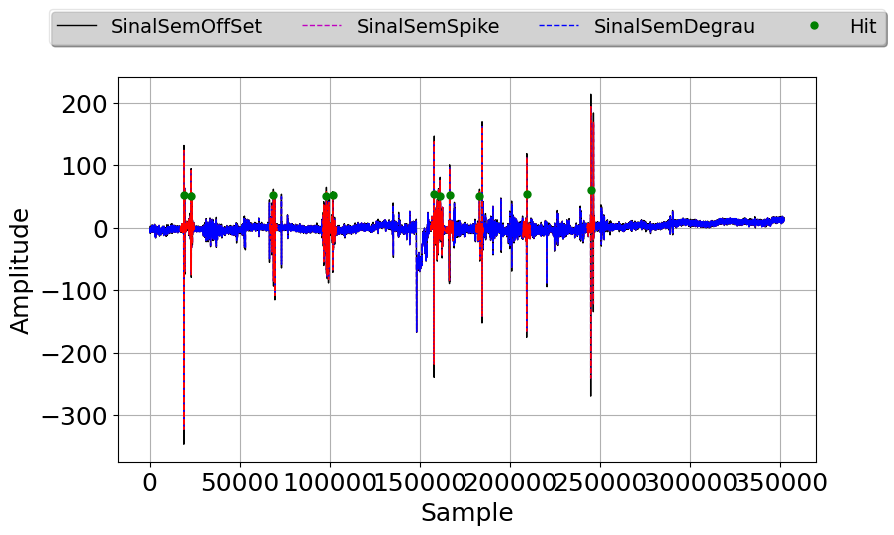

Figura_SVTS_Fig1


In [50]:
###==================================================
# Instância da classe
###==================================================
OperadorSinalEddyCurrent = ClasseProcessarEC()

Janelas_X1_Total = []
Janelas_Y1_Total = []

###==================================================
##   PARÂMETROS DE SIMULAÇÃO
###==================================================
ordem         = 21         ## ordem filtro mediana
Pinferior     = -50        ## patamar inferior para picos 
Psuperior2    = 50         ## patamar superior para picos 
Numpontos     = 3000       ## número de pontos antes e depois do pico
Delay         = 20         ## deley para o threshold
LarguraJanela = 2000       ## tamanho da janela


###==================================================
##   Remover Offset
###==================================================
SinalSemOffSet = OperadorSinalEddyCurrent.RemoverOffSet(Sinal);

###==================================================
##  REMOVE SPIKES 
###==================================================
SinalSemSpike = OperadorSinalEddyCurrent.filtroMediana(SinalSemOffSet, ordem)

###==================================================
##  REMOVE DEGRAL 
###==================================================
multiplicador = 4
SinalSemDegrau = OperadorSinalEddyCurrent.filtroDegrau(SinalSemSpike, Psuperior2*multiplicador)
print("max = ", max(SinalSemDegrau))

###==================================================
##  Threshold
###==================================================
[Xthreshold, Ythreshold] = OperadorSinalEddyCurrent.detectorThresholdPico(SinalSemDegrau, Psuperior2, Numpontos, Delay)
print("Xthreshold = ", len(Xthreshold))


###==================================================
##  Janela Sinal Threshold
###==================================================
[Janelas_X1, Janelas_Y1] = OperadorSinalEddyCurrent.getJanelaThreshold(SinalSemDegrau, Xthreshold, LarguraJanela)
print("Quantidade de Janelas = ", len(Janelas_X1))
print("Tamanho de cada Janela = ", len(Janelas_X1[0]))


###==================================================
## Concatena Todas as Janela Sinal Threshold
###==================================================
for jj in range(len(Janelas_X1)):
  Janelas_X1_Total = OperadorSinalEddyCurrent.concatenaJanela(Janelas_X1_Total, Janelas_X1[jj])
  Janelas_Y1_Total = OperadorSinalEddyCurrent.concatenaJanela(Janelas_Y1_Total, Janelas_Y1[jj])
print("Quantidade de Janelas acumuladas  = ", len(Janelas_X1_Total))
print("Tamanho de cada Janela acumuladas = ", len(Janelas_X1_Total[0]))


###==================================================
##   PLOTES
###==================================================
# OperadorSinalEddyCurrent.ploteY(SinalSemOffSet,"Time", "Signal Amplitude", "")
# OperadorSinalEddyCurrent.ploteY(SinalSemSpike,"Time", "Signal Amplitude", "")


X = OperadorSinalEddyCurrent.getRange(0, len(SinalSemSpike)-1, 1)
OperadorSinalEddyCurrent.ploteMultiploStart(X, SinalSemOffSet,"SinalSemOffSet", 'k','k')
OperadorSinalEddyCurrent.ploteMultiploStop(X, SinalSemSpike, "SinalSemSpike", 'm--','m', "", "", 1)
OperadorSinalEddyCurrent.ploteMultiploStop(X, SinalSemDegrau, "SinalSemDegrau", 'b--','b--', "", "", 1)
for kk in range(len(Janelas_X1)):
  OperadorSinalEddyCurrent.ploteMultiploStop(Janelas_X1[kk], Janelas_Y1[kk], "", 'r--','g--', "", "", 1)  
OperadorSinalEddyCurrent.ploteMultiploStop(Xthreshold, Ythreshold,"Hit", 'go','g',"Sample", "Amplitude", 0)

# Salvar Figuras
print((FigureName % (NumFig)))
OperadorSinalEddyCurrent.savePlot(FlagExportarFig, DirFigs, (FigureName % (NumFig))); NumFig +=1;




## Exemplo Wavelet Power Spectrum

getSize = 1 x 4463


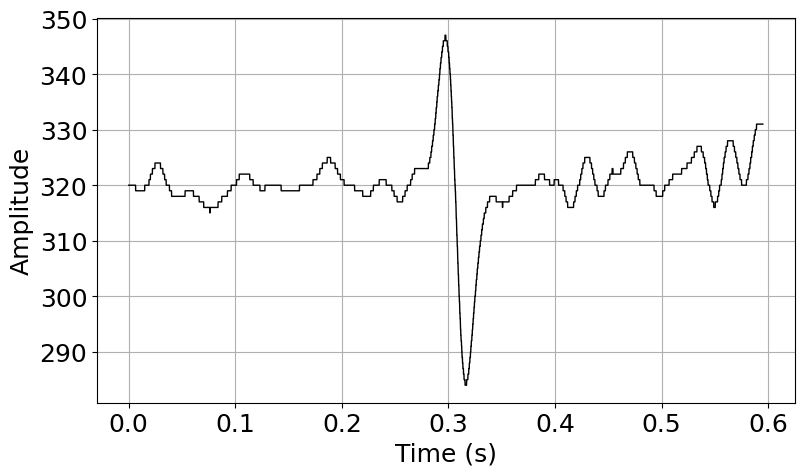

Figura_Wavelet_Fig1
Figura salva em:  /content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_SVTS/Figura_Wavelet_Fig1


/usr/local/lib/python3.7/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log2


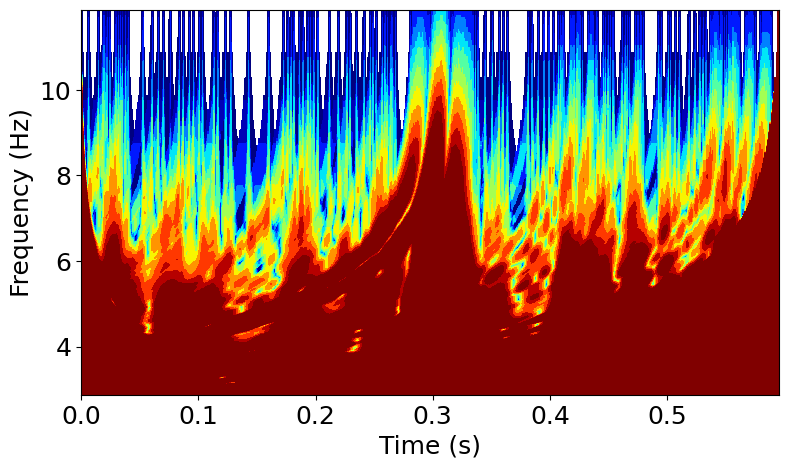

FiguraWCT =  Figure(900x500)
Figura salva em:  /content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet/Figura_Wavelet_Fig2
Figura Close


In [74]:
###==================================================
##   PARÂMETROS DE SIMULAÇÃO
###==================================================
OperadorSinalEddyCurrent  = ClasseProcessarEC()
OperadorWavelet           = ClasseWavelet()

###==================================================
## Configua plotes
###==================================================
NumFig = 1;
FigureName = "Figura_Wavelet_Fig%d"
FlagExportarFig = 1 ; # se flag = 1 os plotes serão salvos em PNG e PFD

###==================================================
##   Carrega Dado
###==================================================
File = "Sinal.txt"
Sinal = OperadorSinalEddyCurrent.openFile(Path, File, " ")


###==================================================
##   PARÂMETROS DE SIMULAÇÃO
###==================================================
AtivarLegenda = True
HidePlotCWT   = True
fs = 7500                     # freq de amostragem
sampling_period = 1/fs
scales = np.arange(1, 512)
Mycmap = 'jet'
levels = [0.03125,0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32]
time   = range(0, len(Sinal))
time   = [(index*sampling_period) for index in time]


###==================================================
##   plot
###==================================================
OperadorSinalEddyCurrent.ploteXY(time, Sinal,"Time (s)","Amplitude","")

# Salvar Figuras
print((FigureName % (NumFig)))
OperadorSinalEddyCurrent.savePlot(FlagExportarFig, DirFigs, (FigureName % (NumFig))); NumFig +=1;


###==================================================
##   Calcula a Continuous Wavelet Transform
###==================================================
[coefficients, frequencies, power, period] = OperadorWavelet.waveletPowerSpectrum(Sinal, scales, 'cmor', sampling_period)


###==================================================
##   Gera Ponteiro da Figura para Continuous Wavelet Transform
###==================================================
OperadorWavelet.Fig_W = 9
FiguraWCT = OperadorWavelet.getPlotWaveletPowerSpectrum(time, frequencies,power,levels,Mycmap, AtivarLegenda)
print("FiguraWCT = ", FiguraWCT)


# Salvar Figuras
FiguraWCT = OperadorWavelet.exportPlot(FlagExportarFig, DirFigWavelet, (FigureName % (NumFig)), FiguraWCT, True);  NumFig +=1;
if (HidePlotCWT):  
  print("Figura Close");
  plt.close('all');






In [ ]:
OperadorSinalEddyCurrent = ClasseProcessarEC()



def wavelet_sinal(nome_da_wavelet,escalas,cmap,amostras,caminho_figuras,sinalfinal):

  #familia2=['cgau1','cgau2','cgau3','cgau4','cgau5','cgau6','cgau7','cgau8','cmor','fbsp','gaus1','gaus2','gaus3','gaus4','gaus5','gaus6','gaus7','gaus8','mexh','morl','shan']
  waveletname = nome_da_wavelet
  time   = range(0, len(sinalfinal))
  scales = np.arange(1, escalas)  
  path = caminho_figuras   
  dt = 1        

  print("debug = ", len(sinalfinal[1]))

  for x in range(0,len(sinalfinal[1])):       
    [coefficients, frequencies] = pywt.cwt(sinalfinal[:,(x)], scales, nome_da_wavelet, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.03125,0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32]
    # contourlevels = np.log2(levels)

    print("debug period = ", len(period))
    print("debug power = ", len(power))
    print("debug time = ", len(time))
    
    plt.figure
    im2 = plt.contourf(time, np.log2(period), np.log2(power), np.log2(levels), extend='both',cmap=cmap)
    # plt.axis('off')   
    
    plt.gca().invert_yaxis() 
    plt.show()  
    


################################
nome_da_wavelet = 'cmor'
escalas         = 512
cmap            = 'coolwarm'
amostras        = 1499 # RODO
caminho_figuras = 'Caminho'
sinalfinal4     = []

for ii in range(1):
  sinalfinal4 = OperadorSinalEddyCurrent.concatenaJanela(sinalfinal4, (Sinal))

sinalfinal4 = OperadorSinalEddyCurrent.listTranspose(sinalfinal4)

print("size 1 = ", len(sinalfinal4))
print("size 1 = ", len(sinalfinal4[0]))

wavelet_sinal(nome_da_wavelet,escalas,cmap,amostras,caminho_figuras, np.array(sinalfinal4))









## Treinamento

###Detectar Sinais
0.   Carregar arquivo
1.   Offset
2.   Filtro Mediana
3.   Filtro degrau
4.   Threshold
5.   Janelar Sinal


In [1]:
print("################################################################")
print("########################### DETECÇÃO ###########################")
print("################################################################")

###==================================================
# Instância da classe
###==================================================
OperadorSinalEddyCurrent = ClasseProcessarEC()
OperadorWavelet          = ClasseWavelet()

Janelas_X1_Total = []
Janelas_Y1_Total = []
Truth            = []
thresholdtotal   = 0


###==================================================
##   PARÂMETROS DE SIMULAÇÃO
###==================================================
ColunaDado    = 2          ## coluna do arquivo a ser analisada 
ordem         = 21         ## ordem filtro mediana
Pinferior     = -50        ## patamar inferior para picos 
Psuperior2    = 150         ## patamar superior para picos 
Numpontos     = 3000       ## número de pontos antes e depois do pico
Delay         = 20         ## deley para o threshold
LarguraJanela = 5000       ## tamanho da janela (dobro)
ATIVARPLOT    = True

###==================================================
## Diretório Dados
###==================================================
SelectFalha = 1; # em cada análise de treinamento identificar a falha

if   (SelectFalha==0):
  Path = "/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Dados/Weld"
elif (SelectFalha==1):
  Path = "/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Dados/Joint"
elif (SelectFalha==2):
  Path = "/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Dados/Crack"
else:
  Path = "/content/drive/MyDrive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Dados/Squat"


TipoFalha   = ["Weld", "Joint", "Crack", "Squat"];

###==================================================
ListaArquivos = OperadorSinalEddyCurrent.getListaArquivos(Path, "txt")
NumArquivos  = len(ListaArquivos)
print("Total de Arquivos no Diretório = ", NumArquivos)


###==================================================
## Analizar dados da Pasta
###==================================================
for ifiles in range(NumArquivos):
  File = ListaArquivos[ifiles]

  print("\n=======================================================================")
  print("Arquivo = ", File)

###==================================================
##   Carregar Sinal
###==================================================
  # arquivo contendo apenas vetor com sinal (comentar)
  Sinal = OperadorSinalEddyCurrent.openFile(Path, File, " ")
  Dim = OperadorSinalEddyCurrent.getSize(Sinal)

  # Arquivo obtido do SVTS  
  if (Dim[1]> 1):
    Sinal = OperadorSinalEddyCurrent.getColumn(Sinal, ColunaDado)
    # Sinal = OperadorSinalEddyCurrent.openFileColumn(Path, File, " ", ColunaDado)

###==================================================
##   Remover Offset
###==================================================
  SinalSemOffSet = OperadorSinalEddyCurrent.RemoverOffSet(Sinal);

###==================================================
##  REMOVE SPIKES 
###==================================================
  SinalSemSpike = OperadorSinalEddyCurrent.filtroMediana(SinalSemOffSet, ordem)

###==================================================
##  REMOVE DEGRAL 
###==================================================
  multiplicador = 4
  SinalSemDegrau = OperadorSinalEddyCurrent.filtroDegrau(SinalSemSpike, Psuperior2*multiplicador)
  print("max = ", max(SinalSemDegrau))

###==================================================
##  Threshold
###==================================================
  [Xthreshold, Ythreshold] = OperadorSinalEddyCurrent.detectorThresholdPico(SinalSemDegrau, Psuperior2, Numpontos, Delay)
  thresholdtotal += len(Xthreshold);
  print("Xthreshold = ", len(Xthreshold))
  
###==================================================
##  Janela Sinal Threshold
###==================================================
  [Janelas_X1, Janelas_Y1] = OperadorSinalEddyCurrent.getJanelaThreshold(SinalSemDegrau, Xthreshold, LarguraJanela)
  print("Quantidade de Janelas = ", len(Janelas_X1))
  if (len(Janelas_X1) > 0):
    print("Tamanho de cada Janela = ", len(Janelas_X1[0]))

###==================================================
## Concatena Todas as Janela Sinal Threshold
###==================================================
  for jj in range(len(Janelas_X1)):
    Janelas_X1_Total = OperadorSinalEddyCurrent.concatenaJanela(Janelas_X1_Total, Janelas_X1[jj])
    Janelas_Y1_Total = OperadorSinalEddyCurrent.concatenaJanela(Janelas_Y1_Total, Janelas_Y1[jj])
    Truth            = OperadorSinalEddyCurrent.concatenaJanela(Truth, TipoFalha[SelectFalha])



###==================================================
## PLOT
###==================================================
  if (ATIVARPLOT):
    X = OperadorSinalEddyCurrent.getRange(0, len(SinalSemSpike)-1, 1)
    OperadorSinalEddyCurrent.ploteMultiploStart(X, SinalSemOffSet,"SinalSemOffSet", 'k','k')
    OperadorSinalEddyCurrent.ploteMultiploStop(X, SinalSemSpike, "SinalSemSpike", 'm--','m', "", "", 1)
    OperadorSinalEddyCurrent.ploteMultiploStop(X, SinalSemDegrau, "SinalSemDegrau", 'b--','b--', "", "", 1)
    for kk in range(len(Janelas_X1)):
      OperadorSinalEddyCurrent.ploteMultiploStop(Janelas_X1[kk], Janelas_Y1[kk], "", 'r--','g--', "", "", 1)
    OperadorSinalEddyCurrent.ploteMultiploStop(Xthreshold, Ythreshold,"Hit", 'go','g',"Sample", "Amplitude", 0)



###==================================================
## Relatorio da Detecção
###==================================================
print("\n=======================================================================")
print("Total de threshold  = ", thresholdtotal)
print("Total de Truth      = ", len(Truth))
print("Classe              = ", TipoFalha[SelectFalha])
print("Quantidade de Janelas acumuladas  = ", len(Janelas_X1_Total))
print("Tamanho de cada Janela acumuladas = ", len(Janelas_X1_Total[0]))
print("Detecção concluída")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))



################################################################
########################### DETECÇÃO ###########################
################################################################


NameError: ignored

Power Spectrum Wavelet
0.   Selecionar Janela
1.   Wavelet Power Spectrum
2.   Plot spectrum

A partir dos sinais janelados é calculado a CWT e gerado o gráfico do power spectrum

################################################################
################# ANÁLISE ESPECTRAL - WAVELET ##################
################################################################
/content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo

Pasta já existente ou diretório errado!
/content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_SVTS

Pasta já existente ou diretório errado!
/content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet

Pasta já existente ou diretório errado!
/content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet_Treino

Pasta já existente ou diretório errado!
/content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet_Validar

CurrentDir     =  /content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo
DirFigs        =  /content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_SVTS
DirFigWavelet  =  /content/drive/My Drive/Colab_Notebooks/Co

/usr/local/lib/python3.7/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log2


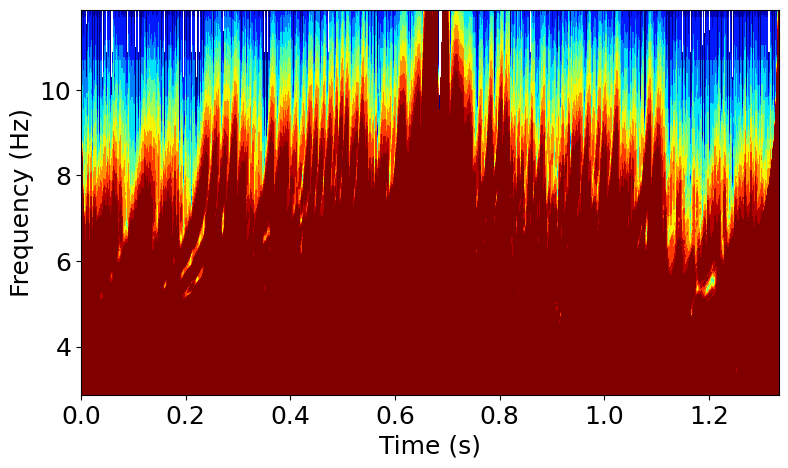

Figura Close


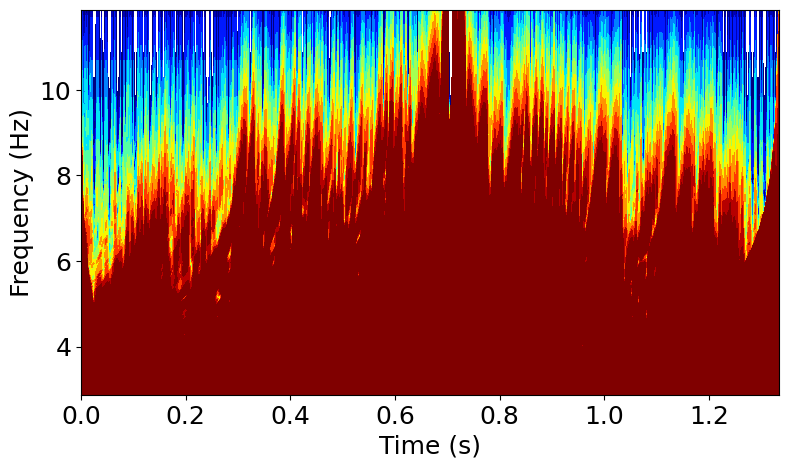

Figura Close


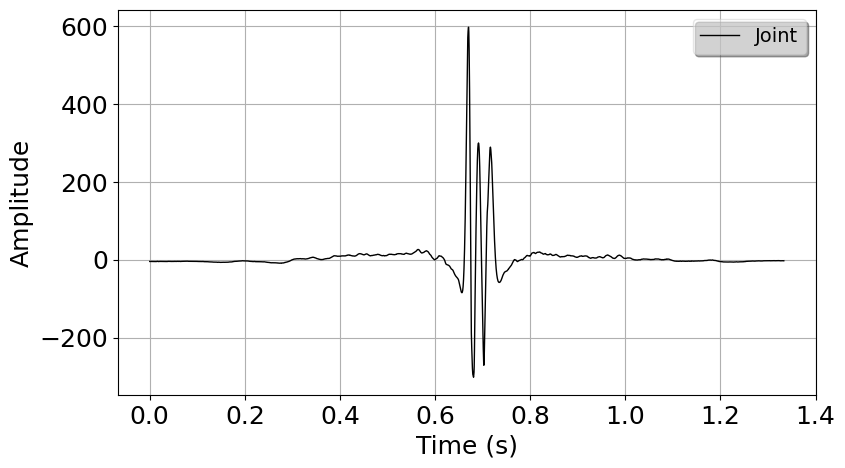

Figura_SVTS_Fig3

Diretório de armazenamento de imagens treino = 
 /content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet_Treino
Espectro Concluído
04-03-2021 17:50:36


In [46]:
print("################################################################")
print("################# ANÁLISE ESPECTRAL - WAVELET ##################")
print("################################################################")


###==================================================
## Cria Pastas
###==================================================
CurrentDir     = OperadorSinalEddyCurrent.getCurrentDirectory();
DirFigs        = OperadorSinalEddyCurrent.criarPasta(CurrentDir, "Figuras_SVTS")
DirFigWavelet  = OperadorSinalEddyCurrent.criarPasta(CurrentDir, "Figuras_Wavelet")
DirFig_treino  = OperadorSinalEddyCurrent.criarPasta(CurrentDir, "Figuras_Wavelet_Treino")
DirFig_validar = OperadorSinalEddyCurrent.criarPasta(CurrentDir, "Figuras_Wavelet_Validar")

print("\nCurrentDir     = ", CurrentDir)
print("DirFigs        = ", DirFigs)
print("DirFigWavelet  = ", DirFigWavelet)
print("DirFig_treino  = ", DirFig_treino)
print("DirFig_validar = ", DirFig_validar)

###==================================================
## Configua plotes
###==================================================
NumFig = 1;
FigureName        = "Figura_SVTS_Fig%d"
FigureNameWavelet = "Figura_Wavelet_Fig%d"
FigureNameTreino  = "%s_Fig%d"

OperadorWavelet.Fig_W = 9
OperadorWavelet.Fig_H = 5

##==================================================
##   CONTROLES DE SIMULAÇÃO CWT
###==================================================
AtivarLegenda = True # ativa a legenda do espectro
HidePlotCWT   = True  # remove plot espectro
PlotSinal     = False
# se flag = 1 os plotes serão salvos em PNG e PFD
FlagExportarFig  = 0; 


##==================================================
##   PARÂMETROS DE SIMULAÇÃO 
###==================================================
fs = 7500                     # freq de amostragem
sampling_period = 1/fs
scales = np.arange(1, 512)
Mycmap = 'jet'
levels = [0.03125,0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8,16,32]
time   = range(0, len(Janelas_X1_Total[0]))
time   = [(index*sampling_period) for index in time]


print("\n=======================================================================")
###==================================================
##   Varrer todas as Janelas
###==================================================
for ithreshold in range(2): #range(thresholdtotal):

###==================================================
##   Carrega janela
###==================================================
  SinalJanela = Janelas_Y1_Total[ithreshold]

###==================================================
##   Calcula a Continuous Wavelet Transform
###==================================================
  [coefficients, frequencies, power, period] = OperadorWavelet.waveletPowerSpectrum(SinalJanela, scales, 'cmor', sampling_period)

###==================================================
##   Gera Ponteiro da Figura para Continuous Wavelet Transform
###==================================================
  FiguraWCT = OperadorWavelet.getPlotWaveletPowerSpectrum(time, frequencies,power,levels,Mycmap, AtivarLegenda)

###==================================================
##   Exporta Figura Espectro
###==================================================
  FiguraWCT = OperadorWavelet.exportPlot(FlagExportarFig, DirFig_treino, (FigureNameTreino % (Truth[ithreshold], NumFig)), FiguraWCT, True);  NumFig +=1;
  if (HidePlotCWT):  
    print("Figura Close");
    plt.close(FiguraWCT);

  if (PlotSinal):
  # plot sinal no tempo
    OperadorSinalEddyCurrent.ploteXY(time, SinalJanela,"Time (s)","Amplitude","")

plt.close('all');
###==================================================
##   Sinal médio
###==================================================
SinalMedio = OperadorSinalEddyCurrent.meanList(OperadorSinalEddyCurrent.listTranspose(Janelas_Y1_Total))
OperadorSinalEddyCurrent.ploteXY(time, SinalMedio,"Time (s)","Amplitude", TipoFalha[SelectFalha])

# Salvar Figuras
print((FigureName % (NumFig)))
OperadorSinalEddyCurrent.savePlot(FlagExportarFig, DirFigs, TipoFalha[SelectFalha]); 

###==================================================
## Relatorio da CWT
###==================================================
print("\n=======================================================================")
print("Diretório de armazenamento de imagens treino = \n", DirFig_treino)
print("Espectro Concluído")
print(datetime.datetime.now(timezone('America/Sao_Paulo')).strftime("%d-%m-%Y %H:%M:%S"))


TREINAR A REDE NEURAL - CNN

################################################################
###################### TREINAMENTO - CNN #######################
################################################################
classLabels     =  ['Crack', 'Squat', 'Joint', 'Weld']
DirFig_treino   =  /content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet_Treino
DirFig_validar  =  /content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet_Validar

Lista de arquivos com extensão:  png
Path:  /content/drive/My Drive/Colab_Notebooks/Colab_EddyCurrent_Artigo/Figuras_Wavelet_Treino
Total de arquivos:  35
Squat_Fig3.png
Squat_Fig4.png
Squat_Fig6.png
Squat_Fig5.png
Squat_Fig7.png
Squat_Fig8.png
Squat_Fig9.png
Squat_Fig10.png
Squat_Fig11.png
Squat_Fig12.png
Squat_Fig13.png
Squat_Fig14.png
Squat_Fig15.png
Squat_Fig16.png
Squat_Fig17.png
Squat_Fig18.png
Squat_Fig19.png
Squat_Fig20.png
Squat_Fig21.png
Squat_Fig22.png
Squat_Fig23.png
Squat_Fig24.png
Squat_Fig25.png
Squat_Fig26.png
Sq

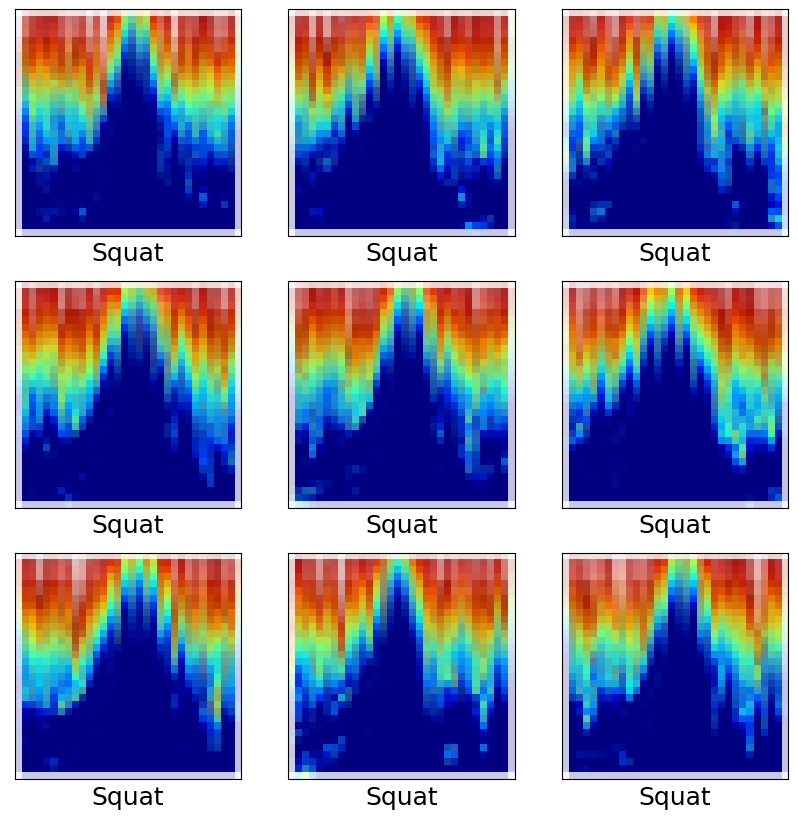

In [ ]:
print("################################################################")
print("###################### TREINAMENTO - CNN #######################")
print("################################################################")
###==================================================
# Instância da classe
###==================================================
OperadorCNN = ClasseNeuralNetworkConvolution()


###==================================================
##   PARÂMETROS DE SIMULAÇÃO
###==================================================
Fig_W = 32;
Fig_H = 32; 
classLabels     = ["Crack", "Squat", "Joint", "Weld"];

print("classLabels     = ", classLabels)
print("DirFig_treino   = ", DirFig_treino)
print("DirFig_validar  = ", DirFig_validar)


###==================================================
##  Lista de arquivos
###==================================================
ListaFigsTreino  = OperadorCNN.getListaArquivos(DirFig_treino, "png")
ListaFigsValidar = OperadorCNN.getListaArquivos(DirFig_validar, "png")



###==================================================
##  Converter imagens para Array Treino
###==================================================
[ImagemArrayTreino, LabelArrayTreino] = OperadorCNN.getImagemToArryResizeCNN(DirFig_treino, ListaFigsTreino, Fig_W, Fig_H, classLabels, 3)
LabelArrayTreino_Num                  = OperadorCNN.getNumberNameList(LabelArrayTreino, classLabels)

print("LabelArrayTreinoNum      = ", LabelArrayTreino.shape)
print("type LabelArrayTreinoNum = ", type(LabelArrayTreino_Num))
print("type LabelArrayTreino    = ", type(LabelArrayTreino))


for ilabel in range(len(LabelArrayTreino)):
  print("ImagemArrayValidar = ", LabelArrayTreino[ilabel], " => ", LabelArrayTreino_Num[ilabel])
  

###==================================================
##  Converter imagens para Array Validar
###==================================================
[ImagemArrayValidar, LabelArrayValidar] = OperadorCNN.getImagemToArryResizeCNN(DirFig_validar, ListaFigsValidar, Fig_W, Fig_H, classLabels, 3)
LabelArrayValidar_Num                   = OperadorCNN.getNumberNameList(LabelArrayValidar, classLabels)

for ilabel in range(len(LabelArrayValidar)):
  print("ImagemArrayValidar = ", LabelArrayValidar[ilabel], " => ", LabelArrayValidar_Num[ilabel])

###==================================================
##  Sumário
###==================================================
print("Image shape = ", (ImagemArrayTreino).shape)
print("Label shape = ", (LabelArrayTreino).shape)
print("Image type img = ", type(ImagemArrayTreino))
print("Image type lbl = ", type(LabelArrayTreino))



###==================================================
##  Plote
###==================================================
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False) 
  plt.imshow(ImagemArrayTreino[i])
  plt.xlabel(LabelArrayTreino[i])
plt.show()






Criar REDE NEURAL - CNN

In [ ]:
#create model
model = models.Sequential()

#add model layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.summary()

Adicionar Camada Densa

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.summary()

TREINAR REDE NEURAL - CNN

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
print("Imagem treino    = ", ImagemArrayTreino.shape)
print("Label Treino     = ", LabelArrayTreino_Num.shape)
# print("type             = ", type(LabelArrayTreino_Num))
print("Imagem Validação = ", ImagemArrayValidar.shape)
print("Label Validação  = ", LabelArrayValidar_Num.shape)
print("type             = ", type(LabelArrayValidar_Num))

history = model.fit(ImagemArrayTreino, LabelArrayTreino_Num, epochs=10, 
                    validation_data=(ImagemArrayTreino, LabelArrayTreino_Num))

##Validação

In [ ]:
print("################################################################")
print("##################### CLASSIFICAÇÃO - CNN ######################")
print("################################################################")

model = Sequential()

width=32; height=32; depth=3; classes=3;
inputShape = (height, width, depth)
chanDim = -1

# if we are using "channels first", update the input shape
# and channels dimension
# if K.image_data_format() == "channels_first":

# "# first CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same",
input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

model.summary()


In [ ]:
from keras.optimizers import SGD
#categorical_crossentropy
opt = SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(ImagemArrayTreino, LabelArrayTreino_Num, validation_data=(ImagemArrayTreino, LabelArrayTreino_Num),
	batch_size=32, epochs=5, verbose=1)

# Teste

In [ ]:
# nome = "vaca.png"
# lista = ["vaso","mesa","bola","carroça"]
# num = 4

# gname = nome[0:num]
# lista_final = [x[0:num] for x in lista]


# print(gname)

# print(lista_final)


# OperadorCNN = ClasseNeuralNetworkConvolution()

# NomeTipo = OperadorCNN.identificaClasseNomeArquivo(nome, lista, 2)
# print("NomeTipo = ",NomeTipo)
OperadorCNN = ClasseNeuralNetworkConvolution()

LabelArrayTreinoNum = OperadorCNN.getNumberNameList(LabelArrayTreino, classLabels)
# print(LabelArrayTreinoNum)

print("Image shape = ", ImagemArrayTreino.shape)
print("Image shape = ", LabelArrayTreinoNum.shape)
print("Image shape = ", LabelArrayTreino_Num[0])


Image shape =  (35, 32, 32, 3)
Image shape =  (35, 1)
Image shape =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


# CNN teste KERAS

[Modelo 1](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)

[Modelo 2](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/cnn.ipynb#scrollTo=8cfJ8AR03gT5)

[Modelo 3](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)

[modelo 4](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [ ]:
##################################################################
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Num img = ", len(X_train))
print("Num img = ", len(X_train[0]))
print("y = ", y_train[0])

Num img =  60000
Num img =  28
y =  5


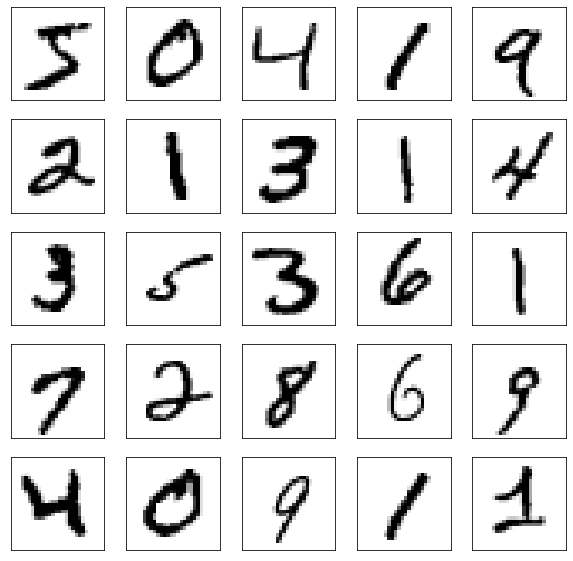

In [ ]:
#plot the first image in the dataset
# plt.imshow(X_train[0])

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
#check image shape
X_train[0].shape

(28, 28)

In [ ]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#check image shape
X_train[0].shape


(28, 28, 1)

In [ ]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 157s 83ms/step - loss: 0.6313 - accuracy: 0.9128 - val_loss: 0.0826 - val_accuracy: 0.9739
Epoch 2/3
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0594 - accuracy: 0.9815 - val_loss: 0.0737 - val_accuracy: 0.9761
Epoch 3/3
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0737 - val_accuracy: 0.9805


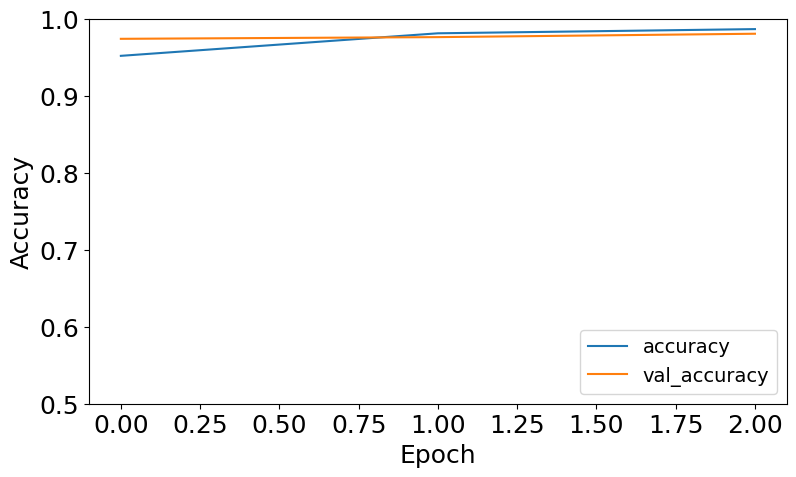

In [ ]:
epochs = range(len(history.history['accuracy']))

plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.plot(epochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

#predict first 4 images in the test set
model.predict(X_test[:4])

#actual results for first 4 images in test set
y_test[:4]

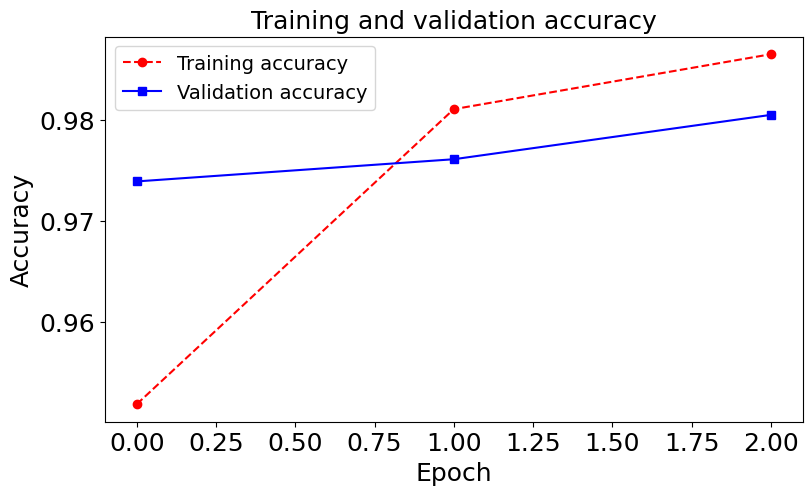

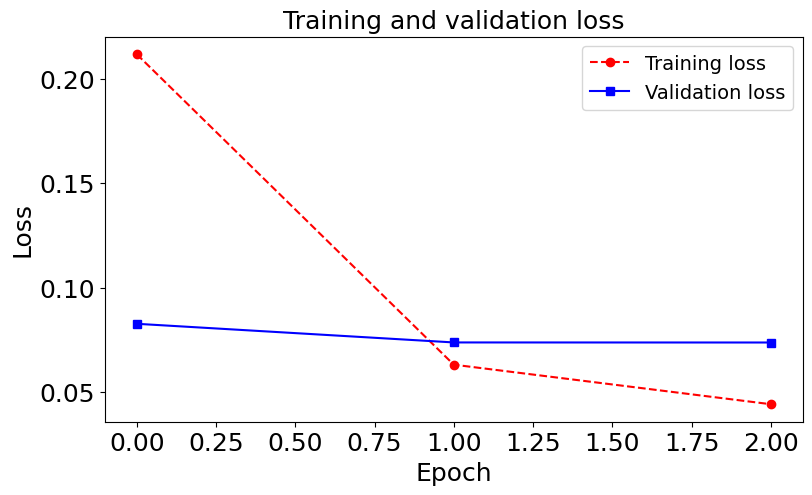

In [ ]:
plt.plot(history.epoch, history.history['accuracy'], 'ro--', label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], 'bs-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.figure()
plt.plot(history.epoch, history.history['loss'], 'ro--', label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], 'bs-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()